## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import xgboost as xgb

from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier

imputer = SimpleImputer()
warnings.filterwarnings("ignore")

### Reading Data from CSV files

In [2]:
df_train = pd.read_csv('iith_foml_2023_train.csv')
df_test = pd.read_csv('iith_foml_2023_test.csv')

### Correlation and Covariance

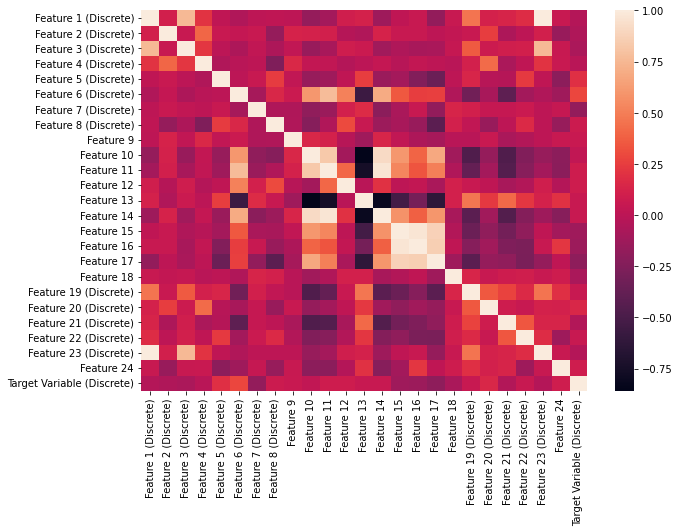

In [3]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr())
plt.show()

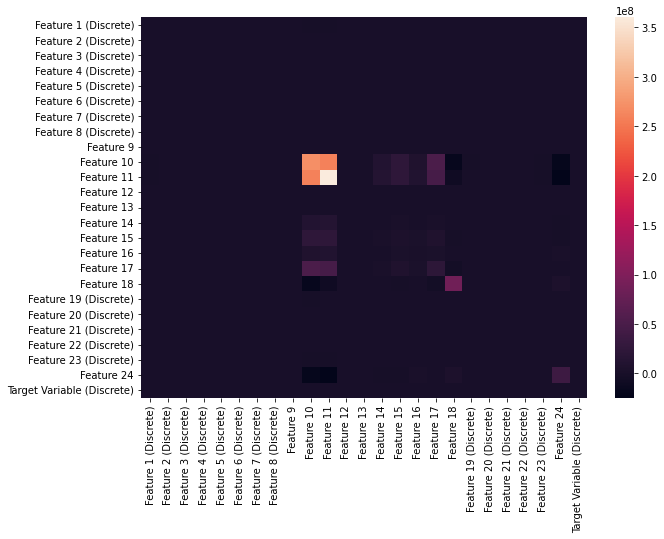

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train.cov())
plt.show()

### Dropping the Features with high Correlation

In [5]:
df_train.drop(['Feature 15','Feature 16','Feature 17','Feature 18'],axis=1,inplace=True)
x=df_train.drop('Target Variable (Discrete)',axis=1)
y=df_train['Target Variable (Discrete)']

Splitting the dataset and Resampling the trianing dataset

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
data_to_add = [331, 3, 104, 2, 3, 0, 4, 0, 0.002, 678.3, 690.1, 0.00085105, 98.101, 98.404, 89, 1, 4, 47, 331, 26619.4]
x_train = np.vstack([x_train, data_to_add])
y_train = np.append(y_train, 11)
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)
oversample = RandomOverSampler()
x_train_resampled, y_train_resampled = oversample.fit_resample(x_train, y_train)
x_train_resampled = imputer.fit_transform(x_train_resampled)

### Using Multiple models to identify the best fit for the given data.

In [7]:
rf_clf = RandomForestClassifier(class_weight='balanced',criterion= 'gini', max_depth= None, min_samples_split= 2, n_estimators= 50,n_jobs=-1)
adaboost_clf = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=50, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.01, max_depth = 6, random_state=42)
xg_clf = xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.01, max_depth = 6, random_state=42)

In [8]:
adaboost_clf.fit(x_train_resampled, y_train_resampled)
gb_clf.fit(x_train_resampled, y_train_resampled)
xg_clf.fit(x_train_resampled, y_train_resampled)
rf_clf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=-1)

F1-Score, Train and Test Accuracies of above models

In [9]:
classifiers = [rf_clf, adaboost_clf, gb_clf, xg_clf]
classifier_names = ['Random Forest', 'AdaBoost with RF', 'Gradient Boosting', 'XGBoost']

for clf, name in zip(classifiers, classifier_names):
    clf.fit(x_train, y_train)
    ypred_train = clf.predict(x_train)
    ypred_test = clf.predict(x_test)
    f1 = f1_score(y_test, ypred_test, average='weighted')

    print(f"Classifier: {name}")
    print(f"F1 Score: {f1}")
    print(f"Train accuracy: {accuracy_score(y_train, ypred_train)}")
    print(f"Test accuracy: {accuracy_score(y_test, ypred_test)}")
    print("---------------------")

Classifier: Random Forest
F1 Score: 0.8328394138043891
Train accuracy: 1.0
Test accuracy: 0.8592964824120602
---------------------
Classifier: AdaBoost with RF
F1 Score: 0.8318070605483663
Train accuracy: 1.0
Test accuracy: 0.8592964824120602
---------------------
Classifier: Gradient Boosting
F1 Score: 0.8192967748222119
Train accuracy: 1.0
Test accuracy: 0.8341708542713567
---------------------
Classifier: XGBoost
F1 Score: 0.8272907387445597
Train accuracy: 0.9434673366834171
Test accuracy: 0.8592964824120602
---------------------


### Multilayer Percpetron Model and its accuracy

In [14]:
mlpc = MLPClassifier(hidden_layer_sizes=(df_train.shape[1]*4, df_train.shape[1]*2), max_iter=6000, alpha=0.001, random_state=42)
mlpc.fit(x_train_resampled, y_train_resampled)
test_predictions = mlpc.predict(x_test)
y_pred = mlpc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 55.10%
F1 Score: 50.68%


In [16]:
test_predictions = mlpc.predict(df_test)
Index=range(1,427)
dme={"Id":Index,"Category":test_predictions}
ansme=pd.DataFrame(data=dme,dtype=int)
filename = 'mlpc_predictions.csv'

ansme.to_csv(filename,index=False) 

print('Saved file: ' + filename)

Saved file: mlpc_predictions.csv


## Below are some function generated later for the purpose of ease file handling

In [11]:
def data_loading():
    # Data Loading
    df_train=pd.read_csv("iith_foml_2023_train.csv")
    df_test=pd.read_csv("iith_foml_2023_test.csv")
    return df_train,df_test

def drop_null(df):
    # drop more missing values features
    df.drop(['Feature 15','Feature 16','Feature 17','Feature 18'],axis=1,inplace=True)
    # drop missing values rows
    df.dropna(inplace=True)
    # separate independatant & dependent features
    x = df.drop(columns=['Target Variable (Discrete)'])
    y = df['Target Variable (Discrete)']
    return x,y
def train_test(x,y):
    # split the data for training & validation
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return x_train,x_test,y_train,y_test

Below is the code which was used to create the file with F1-score of .59 in Kaggle

In [12]:
df_train,df_test=data_loading()
x,y=drop_null(df_train)
x_train,x_test,y_train,y_test=train_test(x,y)
rf=RandomForestClassifier(class_weight='balanced',criterion= 'gini', max_depth= None, min_samples_split= 2, n_estimators= 50,n_jobs=-1)
rf.fit(x_train,y_train) # fit
y_pred = rf.predict(x_test) # prediction for validation data

ypred_train=rf.predict(x_train) # prediction for training data
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

    # Print the results
print(f"Results for rf:")
print(f"train accuracy:{accuracy_score(y_train,ypred_train):.2f}")
print(f"test Accuracy: {accuracy:.2f}")
print("train classification report:")
print(classification_report(y_train, ypred_train))
print("test Classification Report:")
print(report)

#testing data preprocessing
df_test.drop(['Feature 15','Feature 16','Feature 17','Feature 18'],axis=1,inplace=True)
df_test.fillna(df_test.mean(),inplace=True)



output=rf.predict(df_test) # prediction for testing data

# create index for testing predictions
Index=range(1,427)
dme={"Id":Index,"Category":output}
ansme=pd.DataFrame(data=dme)
filename = 'bm23mtech11006_kaggle6.csv'

ansme.to_csv(filename,index=False)

print('Saved file: ' + filename)

Results for rf:
train accuracy:1.00
test Accuracy: 0.93
train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       387
           2       1.00      1.00      1.00        89
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00       

## Applying RF without Feature Removal

In [18]:
data_train = pd.read_csv('iith_foml_2023_train.csv')
data_test = pd.read_csv('iith_foml_2023_test.csv')

x_train = data_train.drop('Target Variable (Discrete)', axis=1)
y_train = data_train['Target Variable (Discrete)']

imputer = SimpleImputer()
x_train = imputer.fit_transform(x_train)


# Train the randomforest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

# Impute missing values in the test data
data_test = imputer.transform(data_test)

# Make predictions using each model
predictions = model_rf.predict(data_test)

# create index for testing predictions
Index=range(1,427)
dme={"Id":Index,"Category":predictions}
ansme=pd.DataFrame(data=dme) # Create  DataFrames for  model predictions

filename = 'rf_predictions.csv'

ansme.to_csv(filename,index=False) # Save predictions to separate CSV files

print('Saved file: ' + filename)


Saved file: rf_predictions.csv


## Randomizing data

In [26]:
def rand_class(input_files, output_file, iterations):
    csv = [pd.read_csv(file) for file in input_files]
    for _ in range(iterations):
        concatenated_df = pd.concat([df.set_index('Id') for df in csv], axis=1, join='inner')
        classes = concatenated_df.filter(like='Category').values
        merged_df = pd.DataFrame({
            'Id': concatenated_df.index,
            'Category': np.apply_along_axis(lambda row: np.random.choice(row), axis=1, arr=classes)
        })
        updated_file_index = np.random.randint(0, len(input_files))
        csv[updated_file_index] = merged_df.copy()
    merged_df.to_csv(output_file, index=False)

rand_class(['rf_predictions.csv', 'bm23mtech11006_kaggle6.csv', 'mlpc_predictions.csv'], 'result.csv', iterations=1000)

In [28]:
rand_class(['result.csv', 'bm23mtech11006_kaggle6.csv', 'mlpc_predictions.csv'], 'bm21btech11008_kaggle9.csv', iterations=1000)